In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": False,
	"inferring": True,
	"site": "PA",
	"training_date": "current", # values: earlier, current
	"mode": "evidential2", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": True,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 6
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': False, 'inferring': True, 'site': 'PA', 'training_date': 'current', 'mode': 'evidential2', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': True, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:396 in __init__()- list(self.date_ids): [0]
ic| dataset.py:417 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
manager.config

{'training': False,
 'inferring': True,
 'site': 'PA',
 'training_date': 'current',
 'mode': 'evidential2',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': True,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [9]:
exp

0

In [10]:
manager.setExperimentPath()
manager.createLogFolders()

In [11]:
# ic(type(dataset), exp, dataset.dates)


In [12]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


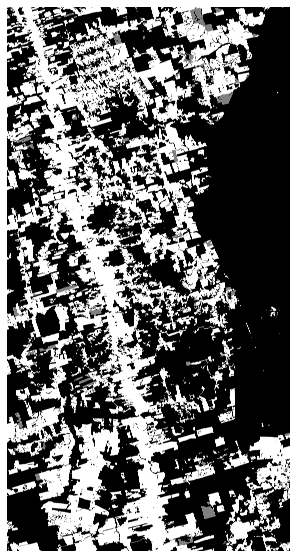

In [13]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [14]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [15]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [16]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([4077704,   24058, 4054038], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([4018062,  155579, 3982159], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([3765218,  334364, 4056218], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([6201069,  140180, 1814551], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([3907947,   93438, 4154415], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4353664,   51100, 3751036], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([5004385,   64045, 3087370], dtype=int64))
Set 8 (array([0, 2], dtype=uint8), array([8148413,    7387], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([5158561,  138139, 2859100], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([3475926,   83519, 4596355], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([4668613,  107494, 3379693], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), array([7750580

In [17]:

manager.label_mask.dtype

dtype('uint8')

In [18]:

manager.getLabelCurrentDeforestation()

In [19]:

manager.loadInputImage()

ic| dataset.py:445 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [20]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

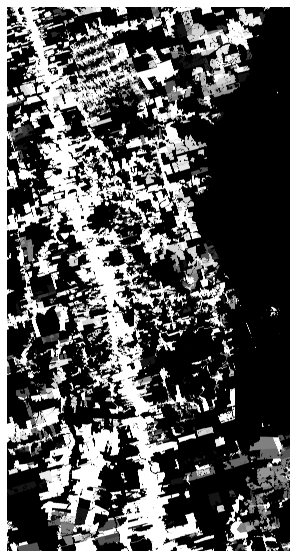

In [21]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

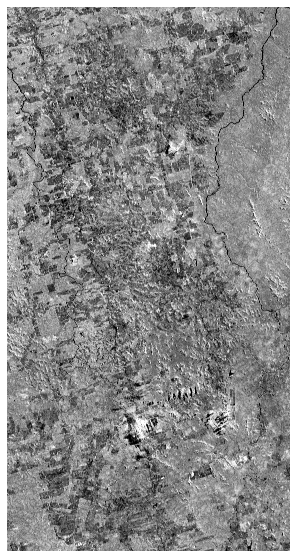

In [22]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [23]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([101787197,   1842912,  59485891], dtype=int64))

In [24]:
# manager.maskNoDataAsNotConsideredClass()

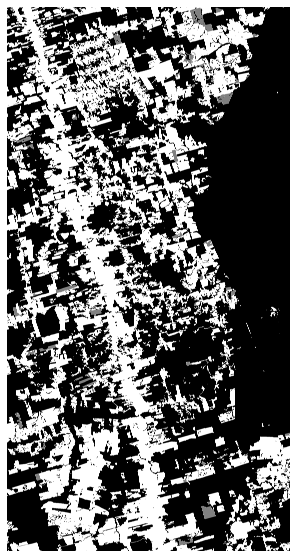

In [25]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [26]:

manager.getImageChannels()

ic| base.py:103 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:105 in getImageChannels()- self.channels: 21


In [27]:

manager.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


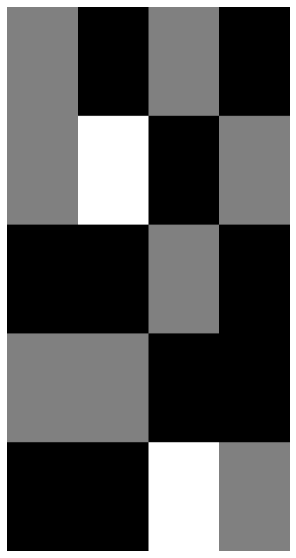

In [28]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [29]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [30]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([38533200,   804466, 25908734], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([9180568,  271248, 6859784], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([54073429,   767198, 26717373], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([101787197,   1842912,  59485891], dtype=int64))


In [31]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 3))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 3))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 3))

train unique percentage [0.591 0.012 0.397]
val unique [0.563 0.017 0.421]
test unique [0.663 0.009 0.328]


In [32]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


In [33]:
if config["training"] == True:
    manager.extractCoords()

In [34]:
if config["training"] == True:
    manager.trainTestSplit()

In [35]:
if config["training"] == True:
    manager.label_mask.shape

In [36]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [37]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [38]:
if config["training"] == True:
    print(manager.coords_train)

In [39]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

In [40]:
if config["training"] == True:
    inputSnipShow = True

In [41]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [42]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [43]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [45]:
manager.dataset.bands

10

In [46]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


In [48]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [51]:
if config["training"] == True:
    manager.getGenerators()


In [52]:
if config["training"] == True:
    manager.fixChannelNumber()

In [53]:
if config["training"] == True:
    print(manager.path_exp)

In [54]:
if config["training"] == True:
    print(manager.channels)

In [55]:
if config["training"] == True:
    print(manager.image_stack.shape)

In [56]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

In [57]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

In [58]:
if config["training"] == True and config["mode"] != 'evidential2':
    manager.plotHistory()


In [59]:
repetition_id = 0

In [60]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [61]:
manager.image_stack.shape

(17730, 9200, 21)

In [62]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [63]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [64]:
manager.image_stack.shape

(17730, 9200, 21)

In [65]:
manager.setPadding()

-30.0 -16.0


In [66]:
'''
import types
manager.infer = types.MethodType(infer, manager)
'''

'\nimport types\nmanager.infer = types.MethodType(infer, manager)\n'

In [67]:
manager.infer()

ic| multioutput.py:152 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/PA/exp0/models/resunet_0.h5'


Dropout training mode: False
time:  0
alpha.shape (17760, 9216, 2)
S.shape (17760, 9216)
K 2
u.shape (17760, 9216)
belief.shape (17760, 9216, 2)


In [68]:
manager.prob_rec.shape

(17760, 9216, 2)

In [69]:
manager.loadPredictedProbabilities()

In [70]:
manager.prob_rec.shape

(17760, 9216, 2)

In [71]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [72]:
manager.prob_rec.shape

(17760, 9216, 2)

In [73]:
manager.getMeanProb()

In [74]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 0.17487797
    np.mean(value): 0.296967
    np.max(value): 0.4753661


In [75]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (17760, 9216, 2)


(17760, 9216, 2)

In [76]:
manager.unpadMeanProb()

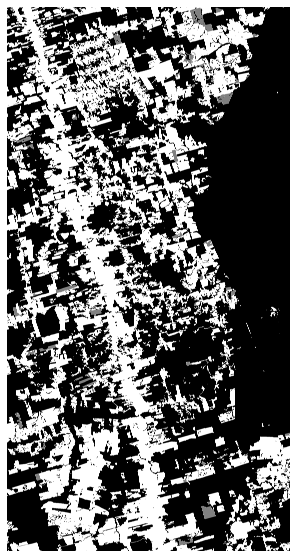

In [77]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [78]:
manager.squeezeLabel()

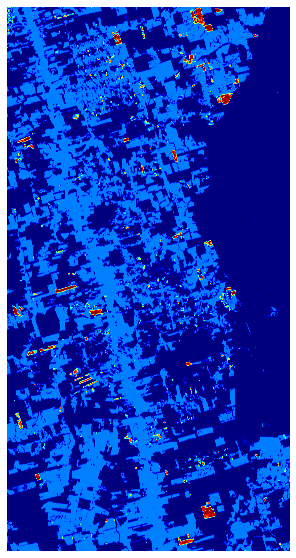

In [79]:
manager.logger.plotFigure(manager.mean_prob[...,1], 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [80]:
print(manager.label_mask.shape)

(17730, 9200)


In [81]:
# manager.getLabelTest()

In [82]:
# manager.getMAP()

In [83]:
manager.prob_rec.shape

(17760, 9216, 2)

In [84]:
# manager.preprocessProbRec()
# print(manager.prob_rec.shape)

In [85]:
manager.prob_rec.shape

(17760, 9216, 2)

In [86]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 0.17487797
    np.mean(value): 0.296967
    np.max(value): 0.4753661


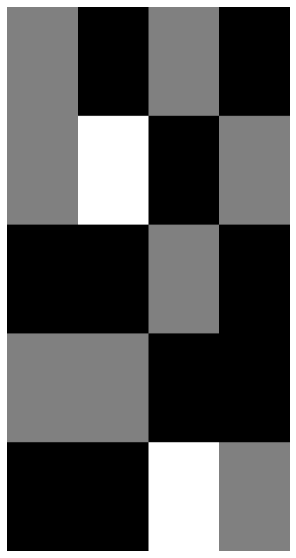

In [87]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [88]:
manager.getLabelCurrentDeforestation()

In [89]:
manager.classes_mode

True

In [90]:
manager.applyProbabilityThreshold()

(17730, 9200, 2)


In [91]:
manager.setMeanProbNotConsideredAreas()


In [92]:
manager.getTestValues()

ic| base.py:421 in getTestValues()- predicted_test.shape: (81558000,)
ic| base.py:430 in getTestValues()- predicted_test.shape: (54840627,)


In [93]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0, 1], dtype=int8), array([160939591,   2176409], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0, 1], dtype=int8), array([161196258,   1919742], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0, 1], dtype=int8), array([162859333,    256667], dtype=int64))


In [94]:
manager.calculateMetrics()

ic| base.py:474 in calculateMetrics()
    self.f1: 84.26
    self.precision: 82.82
    self.recall: 85.74


In [96]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| multioutput.py:220 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (16311600,)


ic| multioutput.py:226 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (9424895,)
ic| base.py:485 in calculateMetricsValidation()
    f1_val: 86.81
    precision_val: 81.52
    recall_val: 92.84
    mAP_val: 91.71


In [97]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [98]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


In [99]:
manager.getErrorMask()

(array([0, 1], dtype=int16), array([162460182,    655818], dtype=int64))


In [100]:
manager.getErrorMaskToShowRGB()

[0 1]


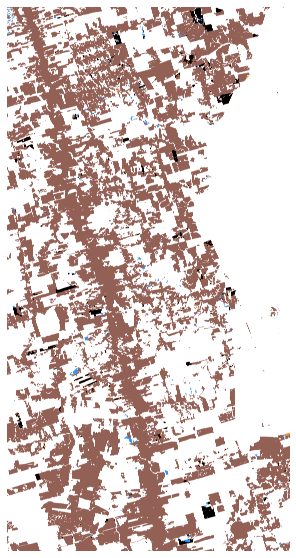

In [101]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [102]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [103]:
manager.setUncertainty()

In [104]:
manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [105]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): 0.34975594
    np.mean(value): 0.40606773
    np.max(value): 0.49999988


In [106]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.22373328
    np.max(value): 0.49992436


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

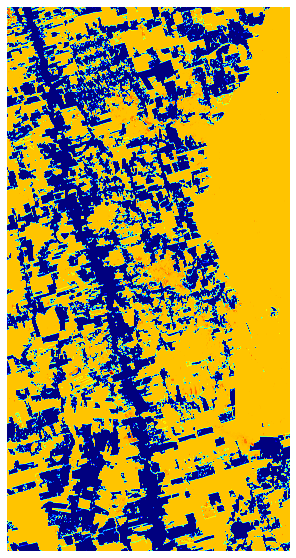

In [107]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



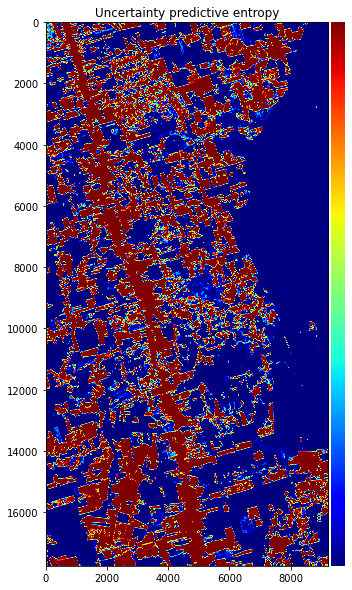

In [108]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [109]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:525 in getTestValues2()
    self.label_mask.shape: (17730, 9200)
ic| base.py:526 in getTestValues2()
    self.mask_amazon_ts.shape: (17730, 9200)
ic| base.py:530 in getTestValues2()
    self.label_mask_test.shape: (81558000,)
ic| base.py:538 in getTestValues2()
    self.error_mask_test.shape: (54718270,)


ic| Logger.py:163 in plotCropSample()
    manager.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    manager.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| Logger.py:165 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| Logger.py:167 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: Invalid shape (1000, 1000, 2) for image data

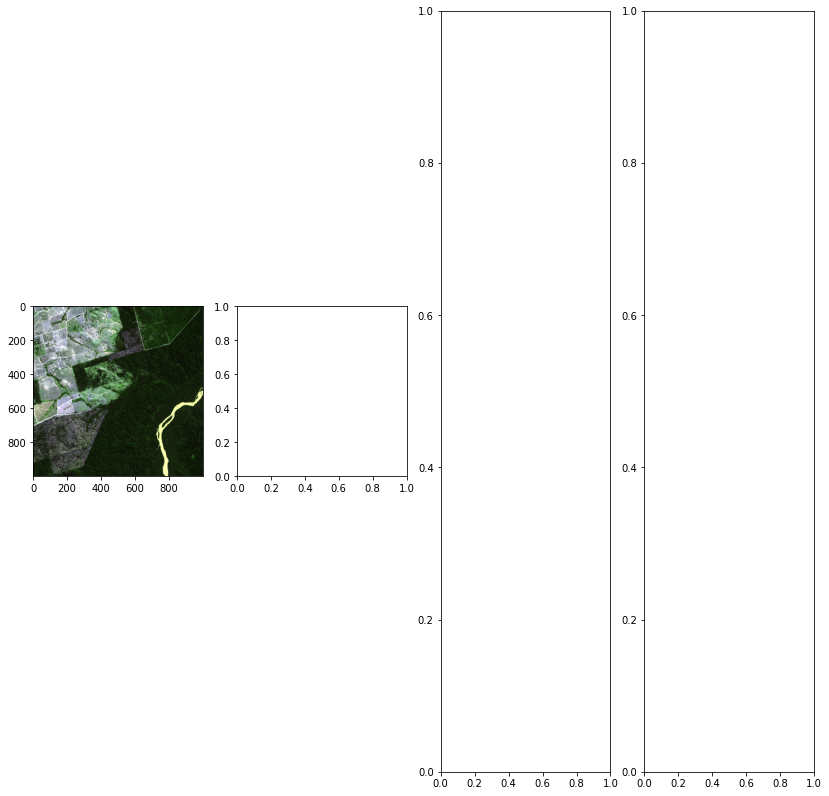

In [110]:
manager.logger.plotCropSample(manager)

In [111]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [112]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [113]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: Invalid shape (1000, 1000, 2) for image data

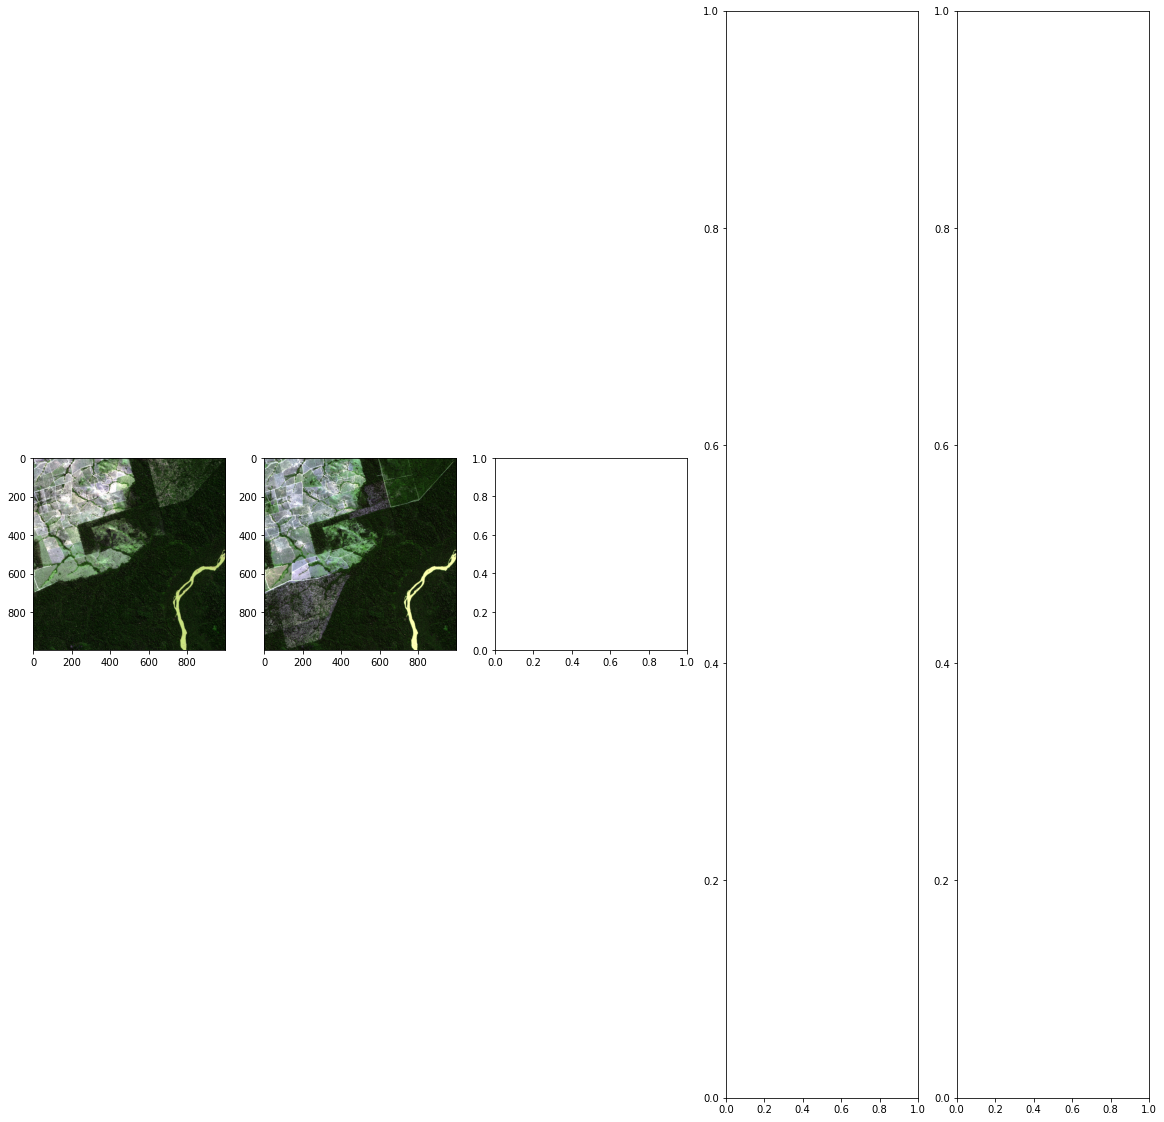

In [114]:
manager.logger.plotCropSampleT0T1(manager)

In [115]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): 0.34975594
    np.mean(value): 0.3525127
    np.max(value): 0.49977198


In [116]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [117]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [118]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [119]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [120]:
manager.config['uncertainty_method'] = 'evidential2'

In [121]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "evidential2":
                self.threshold_list = list(np.linspace(0.353, 0.495, 10))

    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [122]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [123]:

manager.getUncertaintyAAValues()

ic| 1172573004.py:65 in getUncertaintyAAValues()
    self.uncertainty.shape: (54718270,)
    self.label_mask_current_deforestation_test.shape: (54718270,)


[0.353, 0.36877777777777776, 0.38455555555555554, 0.4003333333333333, 0.4161111111111111, 0.4318888888888889, 0.44766666666666666, 0.46344444444444444, 0.4792222222222222, 0.495]
threshold 0.353


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4946091,)
    predicted_test_classified_incorrect.shape: (4946091,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4946091
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4946091
    len(label_mask_current_deforestation_test): 54718270


[0.99972335 0.94817752 0.29966735 0.09039195 0.75829944 0.81552424
 0.0450962 ]
threshold 0.36877777777777776


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2336533,)
    predicted_test_classified_incorrect.shape: (2336533,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2336533
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2336533
    len(label_mask_current_deforestation_test): 54718270


[0.96505989 0.94313669 0.61405448 0.04270115 0.60996075 0.69755835
 0.08071732]
threshold 0.38455555555555554


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1527738,)
    predicted_test_classified_incorrect.shape: (1527738,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1527738
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1527738
    len(label_mask_current_deforestation_test): 54718270


[0.91810787 0.92597132 0.73632324 0.02792007 0.51914281 0.59140449
 0.08897931]
threshold 0.4003333333333333


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (850554,)
    predicted_test_classified_incorrect.shape: (850554,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 850554
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 850554
    len(label_mask_current_deforestation_test): 54718270


[0.85018013 0.88874881 0.82703855 0.01554424 0.48626206 0.43796621
 0.05062394]
threshold 0.4161111111111111


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (506759,)
    predicted_test_classified_incorrect.shape: (506759,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 506759
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 506759
    len(label_mask_current_deforestation_test): 54718270


[0.83025869 0.86274561 0.85440091 0.00926124 0.48834677 0.31510892
 0.00982262]
threshold 0.4318888888888889


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (373163,)
    predicted_test_classified_incorrect.shape: (373163,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 373163
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 373163
    len(label_mask_current_deforestation_test): 54718270


[0.82893415 0.86084687 0.8561097  0.00681971 0.52815013 0.24333004
 0.00651816]
threshold 0.44766666666666666


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (252679,)
    predicted_test_classified_incorrect.shape: (252679,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 252679
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 252679
    len(label_mask_current_deforestation_test): 54718270


[0.82843305 0.86005458 0.85688729 0.00461782 0.57762238 0.15245478
 0.00534803]
threshold 0.46344444444444444


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (146071,)
    predicted_test_classified_incorrect.shape: (146071,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 146071
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 146071
    len(label_mask_current_deforestation_test): 54718270


[0.82819516 0.85918548 0.85722442 0.00266951 0.83756345 0.09827278
 0.00406596]
threshold 0.4792222222222222


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (67146,)
    predicted_test_classified_incorrect.shape: (67146,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 67146
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 67146
    len(label_mask_current_deforestation_test): 54718270


[0.82819578 0.85801522 0.85743785 0.00122712 1.         0.01616162
 0.00161064]
threshold 0.495


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (9355,)
    predicted_test_classified_incorrect.shape: (9355,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 9355
    len(label_mask_current_deforestation_test): 54718270
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 9355
    len(label_mask_current_deforestation_test): 54718270


[8.28197587e-01 8.57487194e-01 8.57448726e-01 1.70966663e-04
            nan 0.00000000e+00 1.34679035e-04]


In [124]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:667 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (54718270,)
    self.label_mask_current_deforestation_test.shape: (54718270,)


threshold 0.353
(54718270,) (54718270,)
cm_audited [[53982600       61]
 [   12048   723561]]
[0.9999157  0.98362173]
threshold 0.36877777777777776
(54718270,) (54718270,)
cm_audited [[53966307    16354]
 [   27234   708375]]
[0.97743432 0.96297761]
threshold 0.38455555555555554
(54718270,) (54718270,)
cm_audited [[53934348    48313]
 [   43303   692306]]
[0.93476673 0.94113313]
threshold 0.4003333333333333
(54718270,) (54718270,)
cm_audited [[53875452   107209]
 [   76155   659454]]
[0.86016151 0.89647353]
threshold 0.4161111111111111
(54718270,) (54718270,)
cm_audited [[53854167   128494]
 [   99989   635620]]
[0.83183923 0.86407317]
threshold 0.4318888888888889
(54718270,) (54718270,)
cm_audited [[53852698   129963]
 [  101799   633810]]
[0.8298408  0.86161262]
threshold 0.44766666666666666
(54718270,) (54718270,)
cm_audited [[53852120   130541]
 [  102566   633043]]
[0.82904173 0.86056995]
threshold 0.46344444444444444
(54718270,) (54718270,)
cm_audited [[53851850   130811]
 [  103

ic| base.py:673 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.9999157 , 0.98362173],
                                  [0.97743432, 0.96297761],
                                  [0.93476673, 0.94113313],
                                  [0.86016151, 0.89647353],
                                  [0.83183923, 0.86407317],
                                  [0.8298408 , 0.86161262],
                                  [0.82904173, 0.86056995],
                                  [0.82857319, 0.85950688],
                                  [0.82830738, 0.85811076],
                                  [0.82820503, 0.85749359]])


cm_audited [[53851818   130843]
 [  104829   630780]]
[0.82820503 0.85749359]


In [125]:
manager.setPlotLimsForUncertaintyAA()

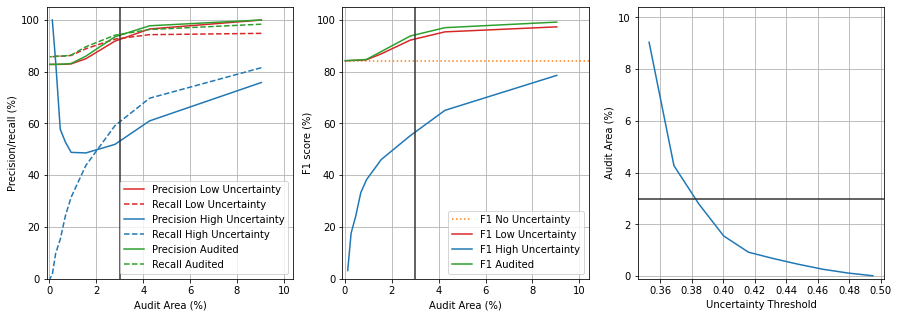

In [126]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [129]:
from scipy import optimize  

def getOptimalUncertaintyThreshold(self, AA = 0.03, bound = 0.0015):

    def getAAFromUncertaintyThreshold(threshold): 
        print(threshold)
        metrics_values2 = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, [threshold])
        return np.abs(AA - metrics_values2[:,3].squeeze())

    bounds = (np.min(self.uncertainty) + 0.0015, np.max(self.uncertainty)-0.0015)
    ic(bounds)
    minimum = optimize.minimize_scalar(getAAFromUncertaintyThreshold, 
        method='bounded', bounds=bounds, tol=0.0001)
    self.threshold_optimal = minimum.x
    ic(self.threshold_optimal)

In [130]:

import types

manager.getOptimalUncertaintyThreshold = types.MethodType(getOptimalUncertaintyThreshold, manager)


In [131]:
manager.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| 2375340957.py:11 in getOptimalUncertaintyThreshold()
    bounds: (0.3512559428215027, 0.49827198243141174)


NameError: name 'optimize' is not defined

In [ ]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.2497943042347343


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3678190,)
    predicted_test_classified_incorrect.shape: (3678190,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3678190
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3678190
    len(label_mask_current_deforestation_test): 122611381


[0.69568232 0.96995757 0.83056072 0.02999876 0.16094719 0.39212666
 0.11958835]
threshold 0.2497943042347343
(122611381,) (122611381,)


ic| base.py:805 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.02999876]),
                     'UEO': array([0.11958835]),
                     'f1': 69.73,
                     'f1_H': array([0.22822154]),
                     'f1_L': array([0.81023796]),
                     'precision_H': array([0.16094719]),
                     'precision_L': array([0.69568232]),
                     'recall_H': array([0.39212666]),
                     'recall_L': array([0.96995757]),
                     'recall_Ltotal': array([0.83056072])}
ic| base.py:806 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.83357095]),
                             'precision': array([0.72837896]),
                             'recall': array([0.9742751])}


cm_audited [[120819266    477591]
 [    33816   1280708]]
[0.72837896 0.9742751 ]


{'metrics': {'precision_L': array([0.69568232]),
  'recall_L': array([0.96995757]),
  'recall_Ltotal': array([0.83056072]),
  'AA': array([0.02999876]),
  'precision_H': array([0.16094719]),
  'recall_H': array([0.39212666]),
  'UEO': array([0.11958835]),
  'f1_L': array([0.81023796]),
  'f1_H': array([0.22822154]),
  'f1': 69.73},
 'metrics_audited': {'precision': array([0.72837896]),
  'recall': array([0.9742751]),
  'f1': array([0.83357095])},
 'exp': 6}